In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.6.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

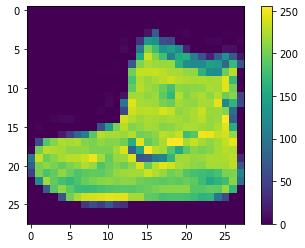

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0 

9 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
0 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
0 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
3 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
0 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
2 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
7 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
2 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
5 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
5 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
0 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
9 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
5 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
5 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
7 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
9 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
1 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
0 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
6 (60000, 28, 28) (60000,) <class 'numpy.ndarray'>
4 (60000, 28, 28) (60000,) <cla

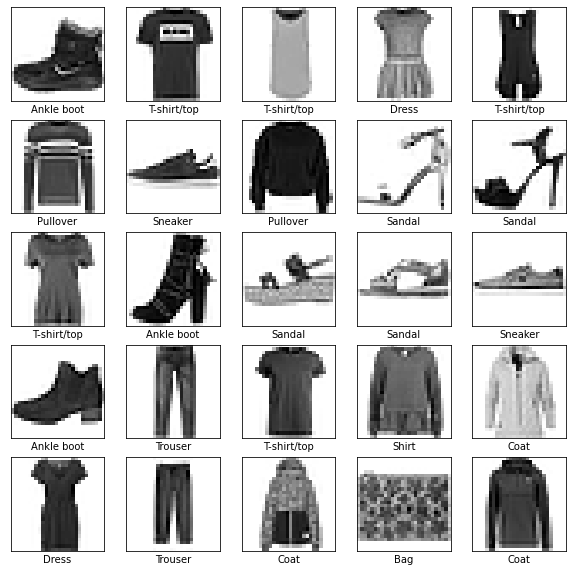

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    print(train_labels[i], train_images.shape, train_labels.shape, type(train_labels))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape = (28, 28)),
   tf.keras.layers.Dense(128, activation = 'relu'),
   tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer = 'adam',
   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
   metrics = ['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4919 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3736 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.2931 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2657 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2526 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.2458 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 881us/step - l

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3467 - accuracy: 0.8799

Test accuracy: 0.8798999786376953


In [19]:
probability_model = tf.keras.Sequential([model,
   tf.keras.layers.Softmax()
])

In [20]:
predictions = probability_model.predict(test_images)
predictions[0]

array([7.2273832e-07, 3.6653985e-11, 5.8443725e-09, 7.9274677e-11,
       4.8528830e-07, 1.2745227e-04, 3.4975548e-07, 1.8374047e-03,
       1.1710570e-09, 9.9803358e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    
    

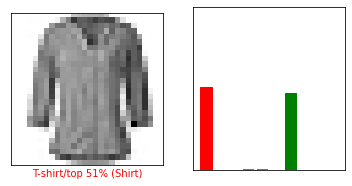

In [40]:
i = 4
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

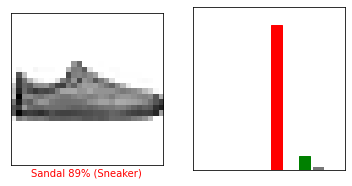

In [31]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

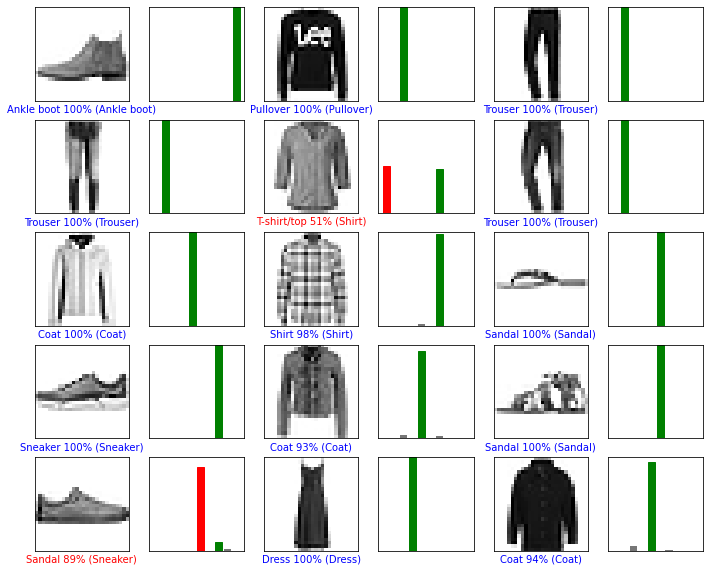

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
img = test_images[0]
print(img.shape)

(28, 28)


In [37]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -7.3002377 -17.189514  -12.117807  -16.418123   -7.698544   -2.1277897
   -8.026052    0.5405778 -13.725379    6.838011 ]]


([<matplotlib.axis.XTick at 0x1f6c910cfd0>,
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'

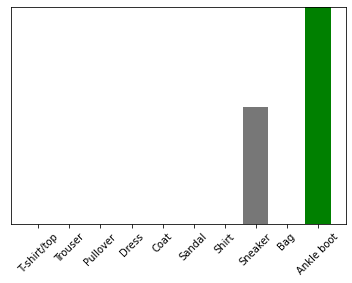

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ * plt.xticks(range(10), class_names, rotation=45)